<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/Project_Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import zipfile - ZipFile is a class of zipfile module for reading and writing zip files. Here we import only class ZipFile from zipfile module. with ZipFile(file_name, 'r') as zip: Here, a ZipFile object is made by calling ZipFile constructor which accepts zip file name and mode parameters

import os - The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.

import the os module to interact with the underlying operating system.

In [ ]:
import os
import zipfile

In [ ]:
from zipfile import ZipFile

Mount google drive to fetch the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Once all the contents in the zipfile is extracted close the archive file. You must call close() before exiting your program or essential records will not be written. ZipFile.

In [ ]:
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/ChestXRay2017.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

os.listdir() method in python is used to get the list of all files and directories in the specified directory.

In [ ]:
os.listdir('/tmp/chest_xray')

['test', 'train', '.DS_Store']

In [ ]:
len(os.listdir('/tmp/chest_xray/test'))

3

In [ ]:
len(os.listdir('/tmp/chest_xray/train'))

3

Training data and testing data have already been separated for this dataset.

Path of the directory for training data

In [ ]:
train_dir='/tmp/chest_xray/train'

In [ ]:
len(train_dir)

21

Path of the directory for testing data

In [ ]:
test_dir='/tmp/chest_xray/test'

In [ ]:
len(test_dir)

20

Pneumonia X ray images are around 3884.

Normal X ray images are around 1389

This is for training dataset

In [ ]:
print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

Train set:
PNEUMONIA=3884
NORMAL=1349


Pneumonia X ray images are around 390

Normal X ray images are around 234

This is for testing dataset

In [ ]:

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

Test set:
PNEUMONIA=390
NORMAL=234


Pyplot is a collection of functions in the popular visualization package Matplotlib. Its functions manipulate elements of a figure, such as creating a figure, creating a plotting area, plotting lines, adding plot labels, etc

figsize=(20, 10) - figure size of width 20, height 10

These lines of code displays 1st 9 images of Pneumonia X ray images of the mentioned size from the training dataset

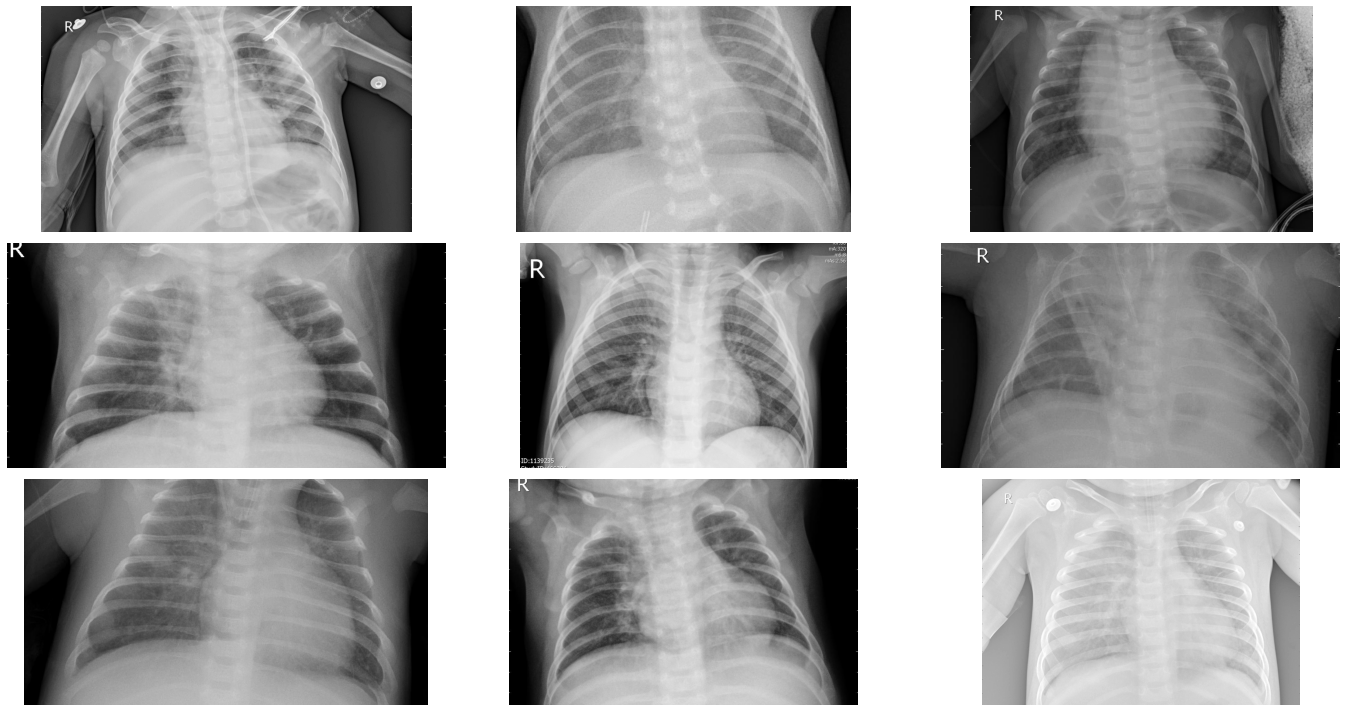

In [ ]:
import matplotlib.pyplot as plt
pneumonia = os.listdir("/tmp/chest_xray/train/PNEUMONIA")
pneumonia_dir = "/tmp/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

The below lines of code displays Normal X ray images from the training dataset

First 9 images from the training dataset normal X ray image have been displayed

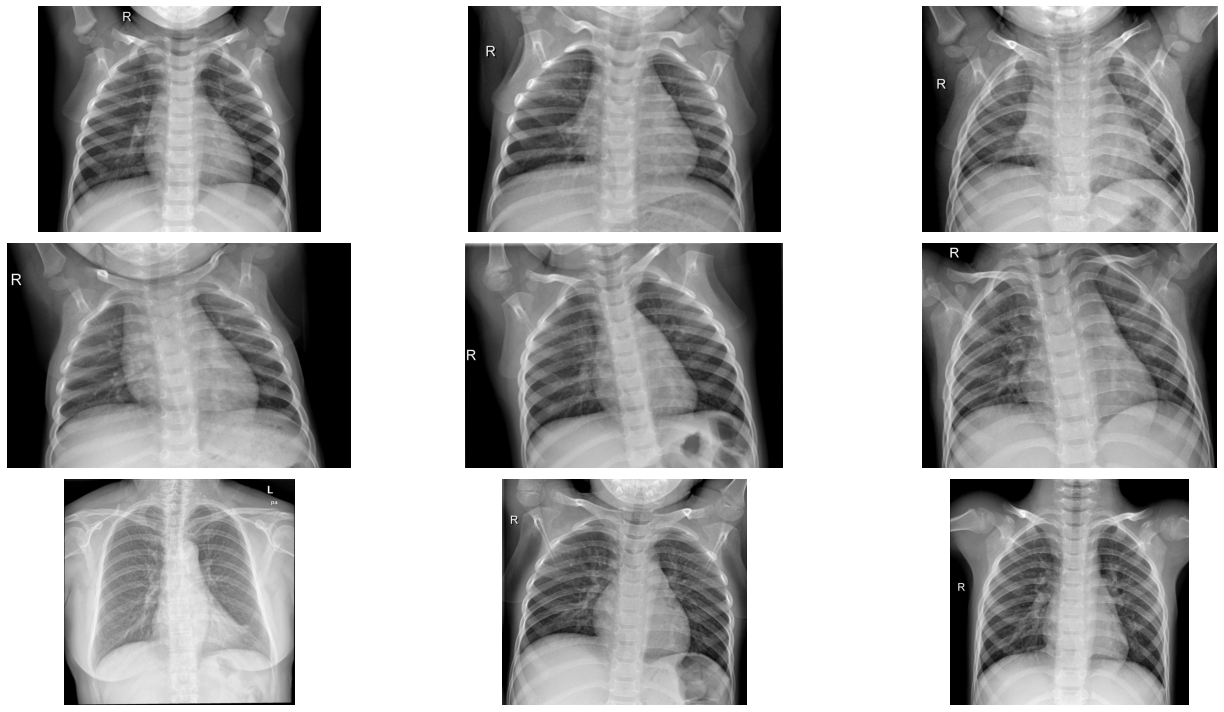

In [ ]:


normal = os.listdir("/tmp/chest_xray/train/NORMAL")
normal_dir = "/tmp/chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()



The below lines of code diaplays the first image of normal X ray image.

The dimensions of the image in pixel is displayed

The maximum value, minimum value of the pixels, mean value of the pixel and standard deviation of the image are displayed. This helps in understanding the statistical description of the image to work with rescaling of the image and feature extraction of the image.

The dimensions of the image are 1341 pixels width and 1682 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 110.2988 and the standard deviation is 65.8317


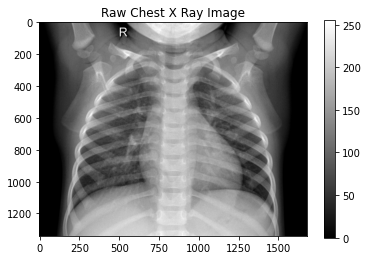

In [ ]:
normal_img = os.listdir("/tmp/chest_xray/train/NORMAL")[0]
normal_dir = "/tmp/chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

Same statistical description is plotted using seaborn

The import seaborn portion of the code tells Python to bring the Seaborn library into your current environment. The as sns portion of the code then tells Python to give Seaborn the alias of sns. This allows you to use Seaborn functions by simply typing sns

NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

The numpy module of Python provides a function called numpy. ravel, which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array. The returned array has the same data type as the source array or input array.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

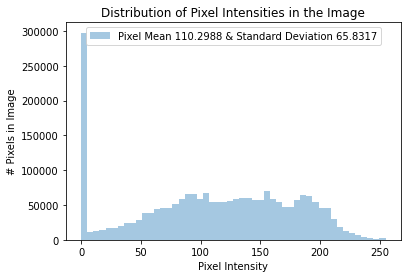

In [ ]:
import seaborn as sns
import numpy as np
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

The bolow lines of code generate batches of tensor image data with real-time data augmentation.

The data will be looped over (in batches).

samplewise_center -	Boolean. Set each sample mean to 0

rotation_range -	Int. Degree range for random rotations.

samplewise_std_normalization -	Boolean. Divide each input by its std.

shear_range -	Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)

zoom_range  -	Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

directory -  string, path to the directory to read images from.

class_mode -  "binary": 1D numpy array of binary labels

batch_size - size of the batches of data. Here it is 8

target_size - tuple of integers (height, width),here it is (180,180). The dimensions to which all images found will be resized.

shuffle -  	whether to shuffle the data (default: True)


In [ ]:
train = image_generator.flow_from_directory(train_dir,
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5232 images belonging to 2 classes.


The same method is followed for the testing data as well. Only the batch size and shuffle parameters are modified

In [ ]:
test = image_generator.flow_from_directory(test_dir,
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 3.5040 and the minimum is -3.0224
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


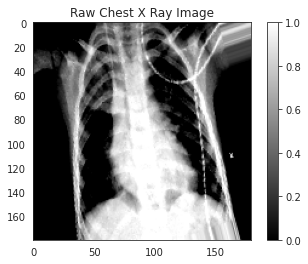

In [ ]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

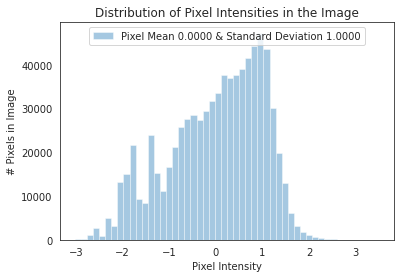

In [ ]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

Here we are working with classification whether pneumonia is present or not. So weights are assigned for presence or absense of pneumonia

In [ ]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


From here we are building a sequential CNN model
In this work building a sequential model is preferred since a Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(169, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

Binary Cross entropy is a probabilistic metric that computes the crossentropy metric between the labels and predictions.

This is the crossentropy metric class to be used when there are only two label classes (0 and 1).

model.summary() to print a useful summary of the model, which includes:

    Name and type of all layers in the model.
    Output shape for each layer.
    Number of weight parameters of each layer.
    If the model has general topology (discussed below), the inputs each layer receives
    The total number of trainable and non-trainable parameters of the model.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 178, 178, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 176, 176, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                        

An epoch means training the neural network with all the training data for one cycle.

Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. A model that is well-fitted produces more accurate outcomes.

In [ ]:


r = model.fit(
    train,
    epochs=10,
    #validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)



Epoch 1/10
100/100 [==============================] - 27s 134ms/step - loss: 1.0380 - accuracy: 0.7237
Epoch 2/10
100/100 [==============================] - 14s 140ms/step - loss: 0.1948 - accuracy: 0.8025
Epoch 3/10
100/100 [==============================] - 14s 142ms/step - loss: 0.1171 - accuracy: 0.8913
Epoch 4/10
100/100 [==============================] - 14s 140ms/step - loss: 0.1288 - accuracy: 0.8788
Epoch 5/10
100/100 [==============================] - 14s 137ms/step - loss: 0.1206 - accuracy: 0.8737
Epoch 6/10
100/100 [==============================] - 14s 140ms/step - loss: 0.1257 - accuracy: 0.8800
Epoch 7/10
100/100 [==============================] - 14s 138ms/step - loss: 0.3016 - accuracy: 0.8000
Epoch 8/10
100/100 [==============================] - 13s 134ms/step - loss: 0.1881 - accuracy: 0.8300
Epoch 9/10
100/100 [==============================] - 14s 136ms/step - loss: 0.0991 - accuracy: 0.9062
Epoch 10/10
100/100 [==============================] - 14s 138ms/step - l

Plotting loss and accuracy on the model.

We have not been working on the validation data. In this case we did not consider using validation dataset since they are more useful  when tuning hyperparameters to see whether the tuning is working—in other words, iterating on your complete model.

This work we are emphasizing more on the transfer learning.

Text(0.5, 1.0, 'Accuracy Evolution')

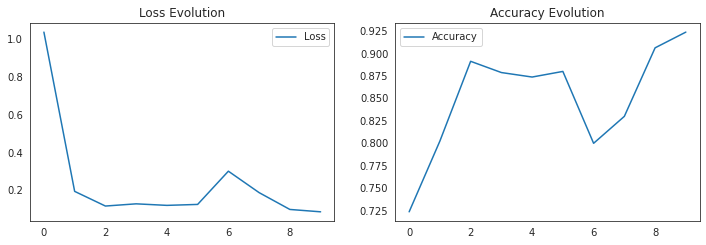

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
#plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
#plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Training accuracy and testing accuracy is calculated on the sequential CNN model.

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 12s 18ms/step - loss: 0.5892 - accuracy: 0.7869
Test Accuracy: 78.69%
654/654 [==============================] - 84s 127ms/step - loss: 0.5406 - accuracy: 0.8001
Train Accuracy: 80.01%


The 50% probability of an X ray image is having pneumonia or not is evaluated on the test data. A confusion matrix is calculated for the same

In [ ]:
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[197  37]
 [ 95 295]]


,0,1,accuracy,macro avg,weighted avg
precision,0.674658,0.888554,0.788462,0.781606,0.808343
recall,0.841880,0.756410,0.788462,0.799145,0.788462
f1-score,0.749049,0.817175,0.788462,0.783112,0.791628
support,234.000000,390.000000,0.788462,624.000000,624.000000


The 70% probability of an X ray image is having pneumonia or not is evaluated on the test data. A confusion matrix is calculated for the same

In [ ]:


print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))



[[213  21]
 [142 248]]


,0,1,accuracy,macro avg,weighted avg
precision,0.600000,0.921933,0.738782,0.760967,0.801208
recall,0.910256,0.635897,0.738782,0.773077,0.738782
f1-score,0.723260,0.752656,0.738782,0.737958,0.741632
support,234.000000,390.000000,0.738782,624.000000,624.000000


No we shall apply our transfer learning on DenseNet 121 Architecture

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29097984/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormali

We have considered weights from the sequential CNN model to be applied on the DenseNet 121 architecture

When loading a given model, the “include_top” argument is set to False, in which case the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained. This is done here because the convolutional layers work as feature extractors. They identify a series of patterns in the image, and each layer can identify more elaborate patterns by seeing patterns of patterns.

In [ ]:


#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:


r = model.fit(
    train,
    epochs=10,
    #validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)



Epoch 1/10
100/100 [==============================] - 28s 155ms/step - loss: 0.2003 - accuracy: 0.8000
Epoch 2/10
100/100 [==============================] - 16s 155ms/step - loss: 0.1010 - accuracy: 0.8813
Epoch 3/10
100/100 [==============================] - 16s 156ms/step - loss: 0.1118 - accuracy: 0.8788
Epoch 4/10
100/100 [==============================] - 16s 156ms/step - loss: 0.0860 - accuracy: 0.9050
Epoch 5/10
100/100 [==============================] - 15s 155ms/step - loss: 0.1026 - accuracy: 0.8938
Epoch 6/10
100/100 [==============================] - 16s 158ms/step - loss: 0.1075 - accuracy: 0.8850
Epoch 7/10
100/100 [==============================] - 16s 155ms/step - loss: 0.0905 - accuracy: 0.9087
Epoch 8/10
100/100 [==============================] - 15s 153ms/step - loss: 0.0677 - accuracy: 0.9250
Epoch 9/10
100/100 [==============================] - 16s 158ms/step - loss: 0.0862 - accuracy: 0.9062
Epoch 10/10
100/100 [==============================] - 16s 156ms/step - l

The training and the testing accuracy is calculated on this DenseNet 121

In [ ]:


evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")



624/624 [==============================] - 18s 25ms/step - loss: 0.6309 - accuracy: 0.8253
Test Accuracy: 82.53%
654/654 [==============================] - 90s 138ms/step - loss: 0.1088 - accuracy: 0.9568
Train Accuracy: 95.68%


In [ ]:


predicted_vals = model.predict(test, steps=len(test))



In [ ]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[144  90]
 [ 11 379]]


,0,1,accuracy,macro avg,weighted avg
precision,0.929032,0.808102,0.838141,0.868567,0.853451
recall,0.615385,0.971795,0.838141,0.793590,0.838141
f1-score,0.740360,0.882421,0.838141,0.811391,0.829148
support,234.000000,390.000000,0.838141,624.000000,624.000000


In [ ]:
print(confusion_matrix(test.classes, predicted_vals > 0.7))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.7, output_dict=True))

[[165  69]
 [ 15 375]]


,0,1,accuracy,macro avg,weighted avg
precision,0.916667,0.844595,0.865385,0.880631,0.871622
recall,0.705128,0.961538,0.865385,0.833333,0.865385
f1-score,0.797101,0.899281,0.865385,0.848191,0.860963
support,234.000000,390.000000,0.865385,624.000000,624.000000


In [ ]:
cnt_ind = 1
list_idx = []
fig = plt.figure(figsize=(14, 14))
X_test_plot = x(img_size, img_size)
for idx, (a, b) in enumerate(zip(y_pre_test, y_pred)):
    if(cnt_ind > 16):break
    if a == b: continue
    plt.subplot(4, 4, cnt_ind)
    plt.imshow(X_test_plot[idx], cmap='gray', interpolation='none')
    plt.title('y_true = {0}\ny_pred = {1}\n ind = {2}'.format(show_condition(a), show_condition(b), idx))
    plt.tight_layout()
    list_idx.append(idx)
    cnt_ind += 1

NameError: ignored

<Figure size 1008x1008 with 0 Axes>

In [ ]:


from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')





58900480/58889256 [==============================] - 1s 0us/step


In [ ]:


vgg16_base_model.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
import tensorflow as tf

vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [ ]:
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:


r = vgg16_model.fit(train,
          epochs=10,
          #validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)



Epoch 1/10
100/100 [==============================] - 21s 161ms/step - loss: 0.2806 - accuracy: 0.6062 - precision: 0.8320 - recall: 0.5629
Epoch 2/10
100/100 [==============================] - 16s 161ms/step - loss: 0.2259 - accuracy: 0.7025 - precision: 0.9332 - recall: 0.6596
Epoch 3/10
100/100 [==============================] - 16s 163ms/step - loss: 0.2027 - accuracy: 0.7387 - precision: 0.9033 - recall: 0.7135
Epoch 4/10
100/100 [==============================] - 16s 160ms/step - loss: 0.1921 - accuracy: 0.7437 - precision: 0.9403 - recall: 0.7048
Epoch 5/10
100/100 [==============================] - 16s 161ms/step - loss: 0.1716 - accuracy: 0.7912 - precision: 0.9520 - recall: 0.7600
Epoch 6/10
100/100 [==============================] - 16s 161ms/step - loss: 0.1789 - accuracy: 0.7663 - precision: 0.9208 - recall: 0.7479
Epoch 7/10
100/100 [==============================] - 16s 161ms/step - loss: 0.1673 - accuracy: 0.8138 - precision: 0.9498 - recall: 0.7923
Epoch 8/10
100/100 [

In [ ]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 14s 20ms/step - loss: 848634.5625 - accuracy: 0.3750 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Accuracy: 37.50%
654/654 [==============================] - 92s 140ms/step - loss: 1034474.3750 - accuracy: 0.2578 - precision: 0.0000e+00 - recall: 0.0000e+00
Train Accuracy: 25.78%
